# 자전거 대여수 예측
- ### colab에서 실행 (추천)

## 데이터 : Kaggle 사이트에 소개된 예제
- ### https://goo.gl/s8qSL5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
%matplotlib inline

## colab에서 실행하는 경우 필요한 코드

In [2]:
!curl -L https://goo.gl/s8qSL5  -o ./bike_train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 54  643k   54  350k    0     0   119k      0  0:00:05  0:00:02  0:00:03  280k
100  643k  100  643k    0     0   210k      0  0:00:03  0:00:03 --:--:--  468k


### read_csv 인수
- index_col : row index 열 정의
- parse_dates : 인덱스 열이나 복수 열의 날짜를 파싱할지 여부
- sep : 필드 분리자 정의
- dayfirst : 유럽식 날짜 표기 (날짜 표기에서 12 이하의 숫자가 두 개 연속인 경우, 날짜와 월 중에서 날짜를 먼저 표시했다는 의미)
- header : 헤더 줄의 수. 헤더가 존재하지 않으면 None
- skiprows : 읽지 않고 그냥 넘어갈 줄의 수
- names : 열 이름

In [2]:
train = pd.read_csv("bike_train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


## datetime 데이터 분해

In [3]:
train["d-year"] = train["datetime"].dt.year
train["d-month"] = train["datetime"].dt.month
train["d-day"] = train["datetime"].dt.day
train["d-hour"] = train["datetime"].dt.hour
train["d-minute"] = train["datetime"].dt.minute
train["d-second"] = train["datetime"].dt.second

train[["datetime", "d-year", "d-month", "d-day", "d-hour", "d-minute", "d-second"]].head()

,datetime,d-year,d-month,d-day,d-hour,d-minute,d-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


### Seaborn
- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- 기본적인 시각화 기능은 Matplotlib 패키지에 의존
- 통계 기능은 Statsmodels 패키지에 의존
- Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조
    - https://seaborn.github.io/

### 여러 개의 subplots 그리기
- figure, axes = plt.subplots(2, 2) : (rows(상하), cols(좌우))
- figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

C:\Users\ojkwon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


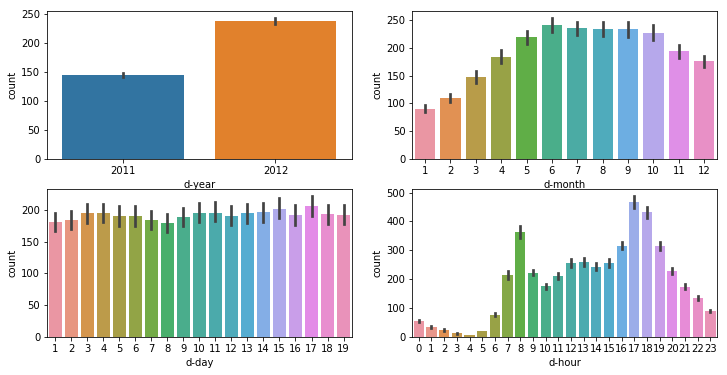

In [7]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12, 6)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)
sns.barplot(data=train, x="d-day", y="count", ax=ax3)
sns.barplot(data=train, x="d-hour", y="count", ax=ax4)

## 시간대별 평균 대여수 (주중, 주말 구분)

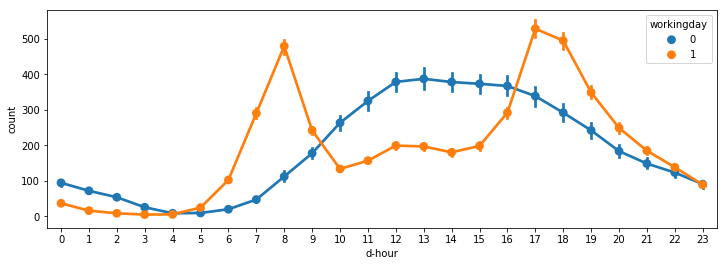

In [8]:
plt.figure(figsize=(12,4))
sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")

## 시간대별 대여수 - 요일 구분

In [4]:
train["d-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "d-dayofweek"]].head()

(10886, 19)


,datetime,d-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


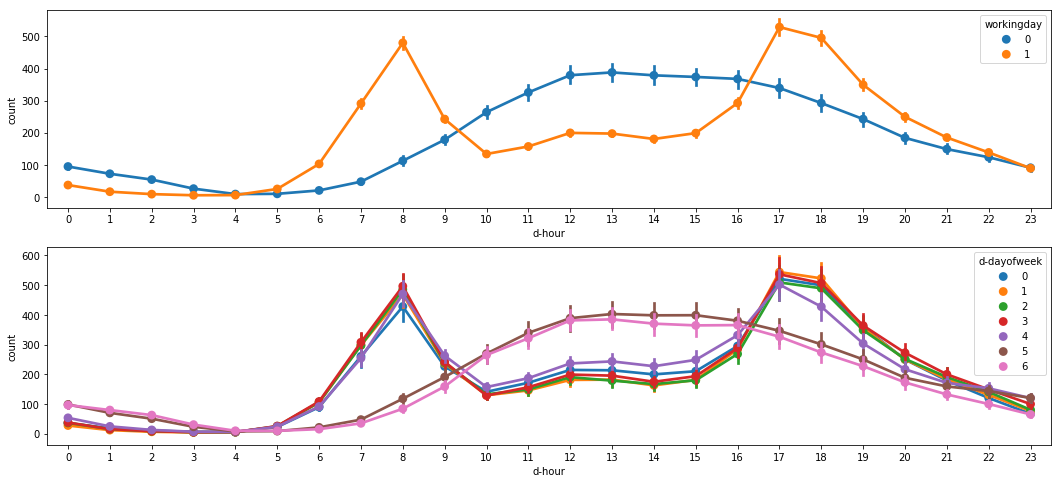

In [10]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="d-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="d-hour", y="count", hue="d-dayofweek", ax=ax2)

## 연도와 월을 합한 특성 변수 생성

- apply(f) : 인수로 제시된 f 함수를 해당 데이터 전체에 일괄 적용

In [5]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["d-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "d-year_month"]].head()

(10886, 20)


,datetime,d-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


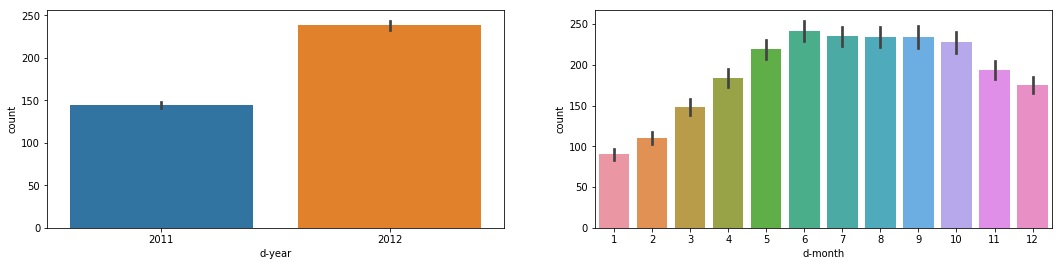

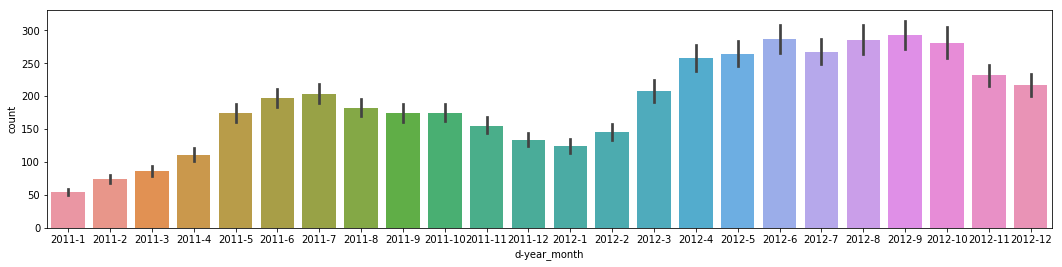

In [12]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year_month", y="count", ax=ax3)

## 훈련 데이터 구성
   - X = train[features]
   - y = train["count"]

- ### 훈련에 사용할 특성 선택
    - features

In [17]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'd-year', 'd-month', 'd-day', 'd-hour', 'd-minute', 'd-second',
       'd-dayofweek', 'd-year_month'],
      dtype='object')

In [6]:
features = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "d-year", "d-hour", "d-dayofweek"]

In [7]:
X = train[features]

print(X.shape)
X.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [20]:
y = train["count"]
print(y.shape)

(10886,)


In [8]:
train["count"]

0         16
1         40
2         32
3         13
4          1
5          1
6          2
7          3
8          8
9         14
10        36
11        56
12        84
13        94
14       106
15       110
16        93
17        67
18        35
19        37
20        36
21        34
22        28
23        39
24        17
25        17
26         9
27         6
28         3
29         2
        ... 
10856    525
10857    353
10858    268
10859    168
10860    132
10861     81
10862     41
10863     15
10864      3
10865      5
10866      7
10867     31
10868    112
10869    363
10870    678
10871    317
10872    164
10873    200
10874    236
10875    213
10876    218
10877    237
10878    334
10879    562
10880    569
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [21]:
import numpy as np
y_log = np.log(y + 1)

print(y_log.shape)
y_log.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

## 간단한 예측 모델
- #### 랜덤 포레스트(30)
- #### 선형 회귀

In [22]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2)

### 랜덤 포레스트

In [23]:
model = RandomForestRegressor(n_estimators= 30)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9580883210969734

In [24]:
list(zip(y_test, model.predict(X_test)))[:10]

[(1.9459101490553132, 2.0403146519508772),
 (3.7612001156935624, 3.7669927593559467),
 (6.415096959171596, 6.302535786676932),
 (2.833213344056216, 2.824032746730312),
 (4.2626798770413155, 4.443539522423507),
 (2.70805020110221, 3.2117684044501233),
 (6.030685260261263, 5.914215047904423),
 (5.4510384535657, 5.41472429655433),
 (5.472270673671475, 5.697741213725065),
 (5.673323267171493, 5.595541299114385)]

In [25]:
X_train[:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
7560,2,0,1,3,22.14,25.760,88,19.0012,2012,9,0
8090,2,0,0,1,25.42,31.060,57,7.0015,2012,11,6
30,1,0,0,2,16.40,20.455,76,12.9980,2011,7,6
7290,2,0,1,2,18.86,22.725,88,0.0000,2012,3,3
8665,3,0,1,2,32.80,37.120,52,12.9980,2012,10,4


### 선형회귀

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.4725950198506078

### 결정 트리

In [27]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.915749021768606

## 성능 지표( score) 함수 변경

In [29]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()    
    score = np.sqrt(mean_difference)
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## Score (lmsle)

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

# 모델의 최적화
### 최적의 하이퍼파라미터를 찾는 과정
- #### 그리드 탐색
- #### 랜덤 탐색

### 그리드(Grid) 탐색
- 여러 가지 하이퍼 파라미터들의 조합에 대해서 가능한 경우를 모두 수행해보는 방식
- 그 중 가장 성능이 좋은 경우를 찾는다

- RandomForestRegressor의 경우 CPU가 많을수록 비례하여 빨리 수행 
- n_jobs = 2 : CPU core를 2개 사용하여 수행
- n_jobs = -1 : 사용하는 컴퓨터의 모든 CPU core를 사용하여 수행

- cross_val_score : default scoring = 'accuracy'
- cv : 교차검증 생성 객체 수 

In [31]:
n_estimators = 30

max_depth_list = [10, 20, 30]
max_features_list = [0.3, 0.5, 0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=11,
                                      n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, cv=5,
                                scoring=rmsle_scorer).mean()

        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

Score = 0.49337
Score = 0.40474
Score = 0.35616
Score = 0.40958
Score = 0.34844
Score = 0.32684
Score = 0.41321
Score = 0.34933
Score = 0.32768


[{'score': 0.4933716623103215,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.3},
 {'score': 0.4047436481972948,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.5},
 {'score': 0.35616225270175655,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.9},
 {'score': 0.40957527563664387,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.3},
 {'score': 0.34843550497543835,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.5},
 {'score': 0.3268438131004311,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.9},
 {'score': 0.41320676232684866,
  'n_estimators': 30,
  'max_depth': 30,
  'max_features': 0.3},
 {'score': 0.3493330277052885,
  'n_estimators': 30,
  'max_depth': 30,
  'max_features': 0.5},
 {'score': 0.32768237093321617,
  'n_estimators': 30,
  'max_depth': 30,
  'max_features': 0.9}]

#### 성능이 좋은 순으로 나열
- pd.DataFrame.from_dict() : dictionary -> DataFrame

In [32]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

(9, 4)


,max_depth,max_features,n_estimators,score
5,20,0.9,30,0.326844
8,30,0.9,30,0.327682
4,20,0.5,30,0.348436
7,30,0.5,30,0.349333
2,10,0.9,30,0.356162


### 랜덤(Random) 탐색
- 그리드 탐색 : 여러 경우의 수를 모두 탐색하는데 시간도 오래 걸리고 최적의 값을 놓치는 경우가 있다.
- 그리드 탐색의 단점 보완 : 최적의 값을 놓치는 문제점을 개선하고 탐색 시간도 줄이는 방법

### 랜덤 탐색
- 1단계 : 일정한 범위 내에서 랜덤하게 성능을 실험하여 대체로 어떤 영역에서 성능이 좋은지를 찾는다.
- 2단계 : 성능이 좋은 영역을 중심으로 세밀하게 탐색

In [33]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [30]:
hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.32621
Score = 0.47942
Score = 0.47942
Score = 0.56134
Score = 0.35105
Score = 0.75337
Score = 0.33773
Score = 0.34663
Score = 0.33773
Score = 0.33057
(10, 4)


,max_depth,max_features,n_estimators,score
0,76,0.804363,30,0.326207
9,82,0.708922,30,0.330568
6,79,0.575713,30,0.337729
8,74,0.577014,30,0.337729
7,12,0.700990,30,0.346634


### 상세 탐색

In [34]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 10
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=10, high=70)
    max_features = np.random.uniform(low=0.4, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.35628
Score = 0.34129
Score = 0.35628
Score = 0.33966
Score = 0.35506
Score = 0.33966
Score = 0.34129
Score = 0.33882
Score = 0.36444
Score = 0.35506
(10, 4)


,max_depth,max_features,n_estimators,score
7,67,0.916531,10,0.338818
3,65,0.841677,10,0.339665
5,49,0.873149,10,0.339665
1,34,0.807500,10,0.341294
6,48,0.802131,10,0.341294


## 최종 모델 선택

In [36]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300,
                              max_depth=70,
                              max_features=0.85,
                              random_state=37,
                              n_jobs=-1)

score = cross_val_score(model, X_train, y_train, cv=5,
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 0.31860


## 주요 특성 변수

In [38]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
           max_features=0.85, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

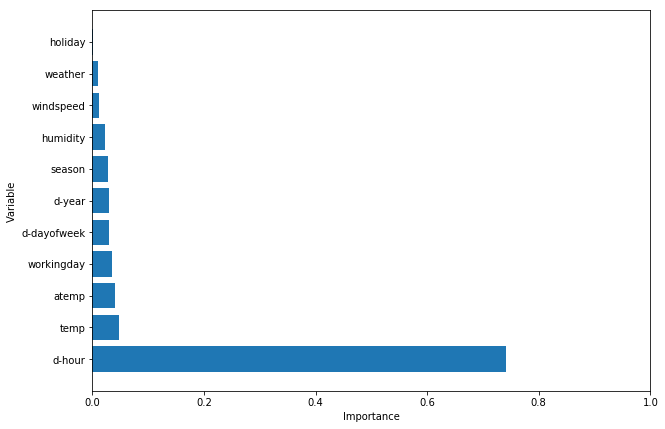

In [39]:
df = pd.DataFrame({'feature':features,'importance':model.feature_importances_ })
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

## 그리드 탐색 함수 : GridSearchCV()
- ### 그리드 탐색과 동시에 교차 검증을 수행

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

import numpy as np

In [42]:
cancer = load_breast_cancer()

In [43]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target)

## Random Forest

In [44]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.958041958041958

###  Grid 탐색
- Grid search 매개변수 설정

In [45]:
params = [{"C": [1,10,100,1000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}]

- params 를 한 눈에 쉽게 보기 위해 임시로 변환 

In [48]:
df_params = pd.DataFrame(params)
df_params

,C,gamma,kernel
0,"[1, 10, 100, 1000]",NaN,[linear]
1,"[1, 10, 100, 1000]","[0.001, 0.0001]",[rbf]


- Grid 탐색 실행

In [49]:
# clf = GridSearchCV(svm.SVC(), params, n_jobs=-1 )  # 이렇게도 OK!!

clf = GridSearchCV(svm.SVC(), param_grid=params, n_jobs=-1 )
clf.fit(X_train, y_train)

print('최적 값 :', clf.best_estimator_)
print('최적 score :', clf.best_score_)

C:\Users\ojkwon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


최적 값 : SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
최적 score : 0.9507042253521126


In [50]:
score = clf.score(X_test, y_test)
print('최종 평가 =',score)

최종 평가 = 0.965034965034965
